# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
#reading the files
df1 = pd.read_excel (r'imputation_homework_12.xlsx')
df2 = pd.read_excel (r'imputation_homework_32.xls')
df3 = pd.read_excel (r'imputation_homework_78.xlsx')

In [3]:
df1.head()

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00


In [4]:
df2.head()

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655


In [5]:
df3.head()

,Unnamed: 0,date,value
0,0,2015-11-03,13.394304
1,1,2015-11-04,-3.800715
2,2,2015-11-05,28.098152
3,3,2015-11-06,20.500562
4,4,2015-11-07,33.981955


In [6]:
df1.isna().sum()

Unnamed: 0    0
x             9
y             0
dtype: int64

In [7]:
df2.isna().sum()

Unnamed: 0     0
time           0
value         48
dtype: int64

In [8]:
df3.isna().sum()

Unnamed: 0     0
date           0
value         81
dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

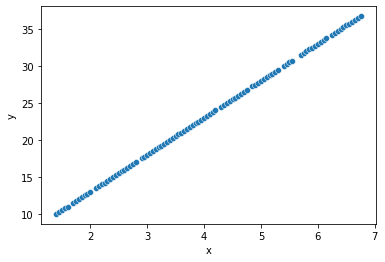

In [9]:
sns.scatterplot(data = df1, x= 'x', y= 'y')

(array([10., 10., 10., 10., 11., 10.,  9.,  8., 10., 11.]),
 array([1.4  , 1.935, 2.47 , 3.005, 3.54 , 4.075, 4.61 , 5.145, 5.68 ,
        6.215, 6.75 ]),
 <BarContainer object of 10 artists>)

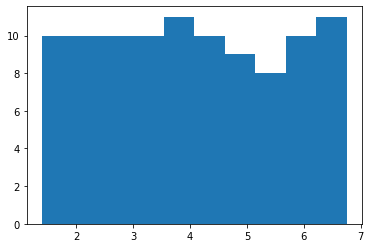

In [10]:
plt.hist(df1['x'])

<AxesSubplot:xlabel='value', ylabel='time'>

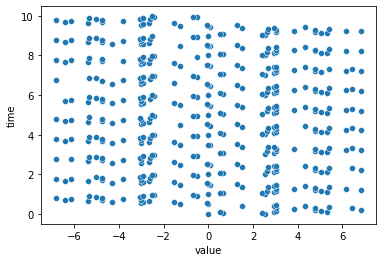

In [11]:
sns.scatterplot(data = df2, x= 'value', y= 'time')

(array([26., 53., 56., 44., 47., 45., 44., 54., 58., 25.]),
 array([-6.81354929e+00, -5.45083943e+00, -4.08812957e+00, -2.72541971e+00,
        -1.36270986e+00, -7.10542736e-15,  1.36270986e+00,  2.72541971e+00,
         4.08812957e+00,  5.45083943e+00,  6.81354929e+00]),
 <BarContainer object of 10 artists>)

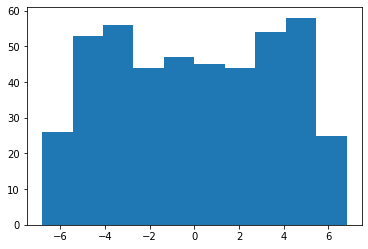

In [12]:
plt.hist(df2['value'])

<AxesSubplot:xlabel='date', ylabel='value'>

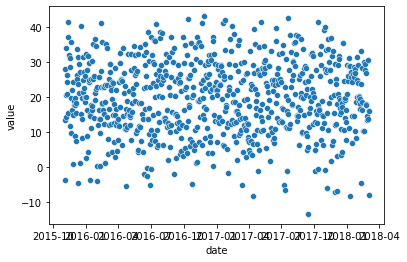

In [13]:
sns.scatterplot(data = df3, x= 'date', y= 'value')

(array([  4.,  16.,  27.,  80., 132., 148., 140., 122.,  78.,  24.]),
 array([-13.37967282,  -7.73184197,  -2.08401111,   3.56381975,
          9.2116506 ,  14.85948146,  20.50731232,  26.15514317,
         31.80297403,  37.45080489,  43.09863574]),
 <BarContainer object of 10 artists>)

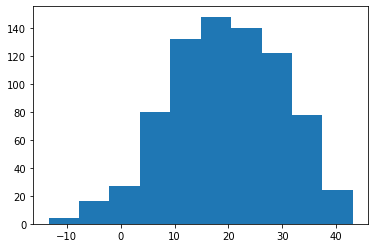

In [14]:
plt.hist(df3['value'])

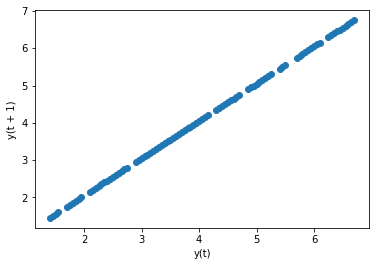

In [15]:
pd.plotting.lag_plot(df1['x']);

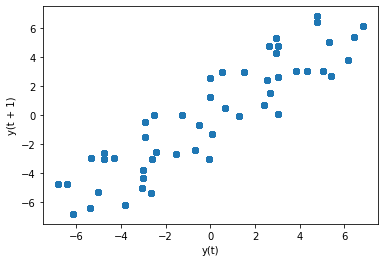

In [16]:
pd.plotting.lag_plot(df2['value']);

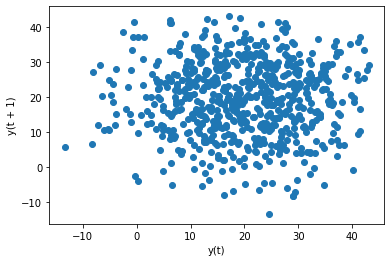

In [17]:
pd.plotting.lag_plot(df3['value']);

For the 1st dataframe:
The histogram and lagplots are perfectly linear. Hence we can assume that the data matters and we interpolate.

For the 2nd dataframe:
The scatterplot and lagplot, though not perfectly linear but are not scattered. Hence we can conclude that data matters and we interpolate.

For the 3rd dataframe:
The scatterplot and lagplot are both too scattered, which suggessts that data does not matter. Hence we will fill the missing values by sampling.

In [18]:
df1.interpolate(method='linear', inplace=True)
df1

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [19]:
df1.isna().sum()

Unnamed: 0    0
x             0
y             0
dtype: int64

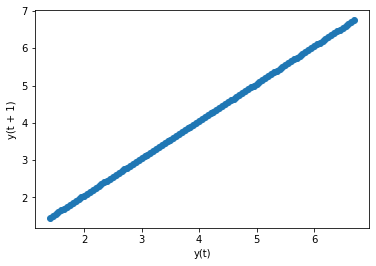

In [20]:
pd.plotting.lag_plot(df1['x']);

(array([11., 11., 11., 10., 11., 11., 10., 11., 11., 11.]),
 array([1.4  , 1.935, 2.47 , 3.005, 3.54 , 4.075, 4.61 , 5.145, 5.68 ,
        6.215, 6.75 ]),
 <BarContainer object of 10 artists>)

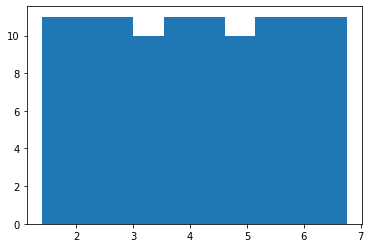

In [21]:
plt.hist(df1['x'])

In [22]:
df2.interpolate(method='polynomial', order = 2, inplace=True)
df2

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [23]:
df2.isna().sum()

Unnamed: 0    0
time          0
value         0
dtype: int64

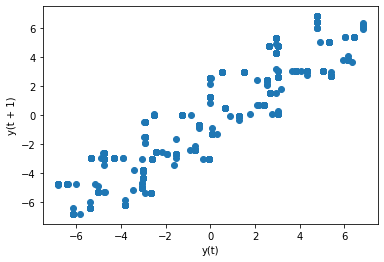

In [24]:
pd.plotting.lag_plot(df2['value']);

(array([29., 58., 65., 48., 50., 50., 48., 63., 59., 30.]),
 array([-6.81354929e+00, -5.45083943e+00, -4.08812957e+00, -2.72541971e+00,
        -1.36270986e+00, -7.10542736e-15,  1.36270986e+00,  2.72541971e+00,
         4.08812957e+00,  5.45083943e+00,  6.81354929e+00]),
 <BarContainer object of 10 artists>)

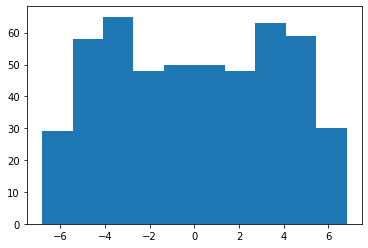

In [25]:
plt.hist(df2['value'])

In [27]:
df3['value'].fillna(random.choice(df3['value'][df3['value'].notna()]), inplace=True)
df3

,Unnamed: 0,date,value
0,0,2015-11-03,13.394304
1,1,2015-11-04,-3.800715
2,2,2015-11-05,28.098152
3,3,2015-11-06,20.500562
4,4,2015-11-07,33.981955
...,...,...,...
847,847,2018-02-27,14.469096
848,848,2018-02-28,30.466798
849,849,2018-03-01,13.722157
850,850,2018-03-02,16.117787


In [28]:
df3.isna().sum()

Unnamed: 0    0
date          0
value         0
dtype: int64

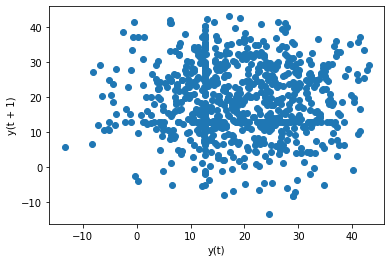

In [29]:
pd.plotting.lag_plot(df3['value']);

(array([  4.,  16.,  27.,  80., 213., 148., 140., 122.,  78.,  24.]),
 array([-13.37967282,  -7.73184197,  -2.08401111,   3.56381975,
          9.2116506 ,  14.85948146,  20.50731232,  26.15514317,
         31.80297403,  37.45080489,  43.09863574]),
 <BarContainer object of 10 artists>)

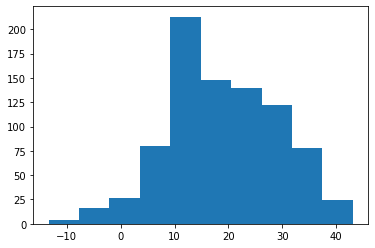

In [30]:
plt.hist(df3['value'])